
=== INVENTORY SUMMARY ===
       Current_Stock  Reorder_Level  Monthly_Sales  Lead_Time_Days  \
count     120.000000     120.000000     120.000000      120.000000   
mean      247.850000     125.433333     156.583333       11.708333   
std       132.259399      50.250588      86.363856        5.119408   
min        11.000000      31.000000       5.000000        3.000000   
25%       138.500000      77.000000      92.250000        7.000000   
50%       237.000000     133.000000     150.000000       12.000000   
75%       353.250000     173.000000     241.250000       15.000000   
max       494.000000     198.000000     294.000000       20.000000   

       Cost_Price  Selling_Price  Stockout_Risk  Profit_Margin  \
count  120.000000     120.000000     120.000000     120.000000   
mean   100.772750     155.776667      91.266667      55.003917   
std     57.002359      81.181917     170.577799      95.184326   
min      7.670000      10.750000    -229.000000    -179.970000   
25%     54.2

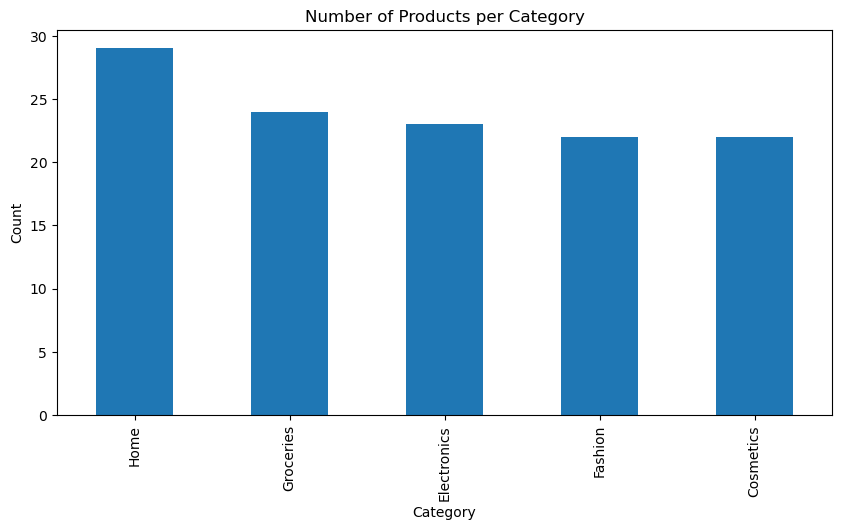

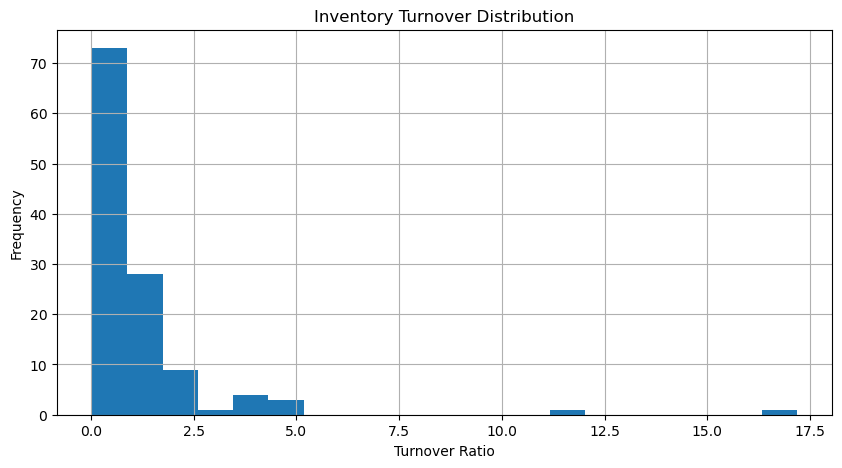

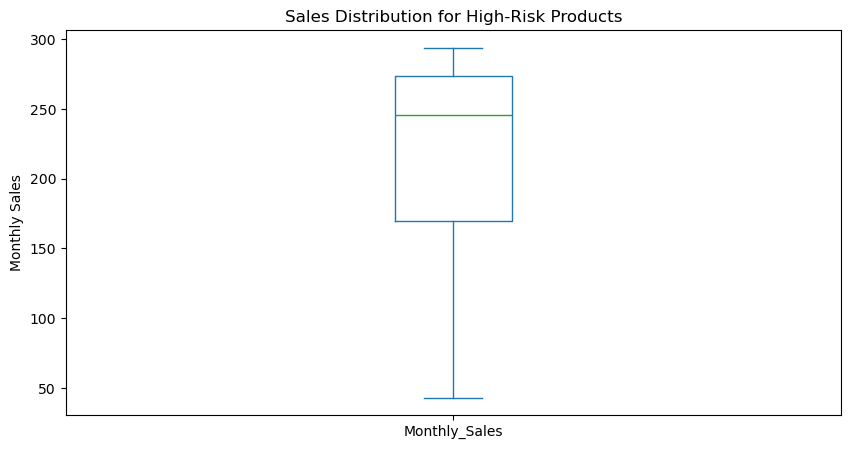


File Exported: SupplyChain_Inventory_Data.xlsx


In [1]:
# --------------------------------------------------------------
# SUPPLY CHAIN & INVENTORY ANALYTICS PROJECT
# End-to-end project: dataset creation → analysis → charts → export
# --------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. CREATE DATASET
# -----------------------------

np.random.seed(42)

num_products = 120

categories = ["Electronics", "Groceries", "Fashion", "Home", "Cosmetics"]

df = pd.DataFrame({
    "Product_ID": [f"P{i:04d}" for i in range(1, num_products + 1)],
    "Category": np.random.choice(categories, num_products),
    "Current_Stock": np.random.randint(10, 500, num_products),
    "Reorder_Level": np.random.randint(30, 200, num_products),
    "Monthly_Sales": np.random.randint(5, 300, num_products),
    "Lead_Time_Days": np.random.randint(3, 21, num_products),
    "Cost_Price": np.random.uniform(5, 200, num_products).round(2),
    "Selling_Price": np.random.uniform(10, 300, num_products).round(2),
})

# -----------------------------
# 2. CREATE DERIVED METRICS
# -----------------------------

df["Stockout_Risk"] = df["Current_Stock"] - df["Monthly_Sales"]
df["Stockout_Risk_Flag"] = df["Stockout_Risk"].apply(lambda x: "High Risk" if x < 0 else "Safe")

df["Profit_Margin"] = (df["Selling_Price"] - df["Cost_Price"]).round(2)
df["Total_Inventory_Value"] = (df["Current_Stock"] * df["Cost_Price"]).round(2)

df["Inventory_Turnover"] = (df["Monthly_Sales"] / df["Current_Stock"]).round(2)

# -----------------------------
# 3. SUMMARY STATISTICS
# -----------------------------

print("\n=== INVENTORY SUMMARY ===")
print(df.describe())

print("\n=== STOCKOUT RISK COUNTS ===")
print(df["Stockout_Risk_Flag"].value_counts())

print("\n=== PRODUCTS HIGHLY PROFITABLE (TOP 10) ===")
print(df.sort_values("Profit_Margin", ascending=False).head(10))

# -----------------------------
# 4. VISUALIZATIONS
# -----------------------------

plt.figure(figsize=(10,5))
df["Category"].value_counts().plot(kind="bar")
plt.title("Number of Products per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
df["Inventory_Turnover"].hist(bins=20)
plt.title("Inventory Turnover Distribution")
plt.xlabel("Turnover Ratio")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
df[df["Stockout_Risk_Flag"]=="High Risk"]["Monthly_Sales"].plot(kind="box")
plt.title("Sales Distribution for High-Risk Products")
plt.ylabel("Monthly Sales")
plt.show()

# -----------------------------
# 5. EXPORT TO EXCEL
# -----------------------------

df.to_excel("SupplyChain_Inventory_Data.xlsx", index=False)

print("\nFile Exported: SupplyChain_Inventory_Data.xlsx")